In [1]:
import pandas as pd  #Import library Pandas
import matplotlib.pyplot as plt #Import matplotlib 
import numpy as np #Import numpy Pandas
import seaborn as sns #Import seaborn Pandas
%matplotlib inline 

pd.set_option("display.float_format",lambda x :"%05f" %x)

In [2]:
df=pd.read_csv("googleplaystore.csv") #Read date 

In [3]:
df.head() # Show the first five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info() # informations data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()   ##used to view some basic statistical 

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.drop("Genres",axis=1,inplace=True) ##drob unnecessary columns
df.drop("Reviews",axis=1,inplace=True)
df.drop("Current Ver",axis=1,inplace=True)

In [7]:
df.isna().sum() #check nulls

App                  0
Category             0
Rating            1474
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Last Updated         0
Android Ver          3
dtype: int64

In [8]:
df.Rating.fillna(0,inplace=True)  # All nAn coulm Rating =  zero ratings

In [9]:
df.dropna(inplace=True)  # #drob null values 

In [10]:
df.Installs=df.Installs.str.replace(",","") # Converting a object to a floot 

In [11]:
df.Installs =df.Installs.str.replace("+","")  # Converting a object to a floot 

<ipython-input-11-6b32a0fb489f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Installs =df.Installs.str.replace("+","")  # Converting a object to a floot


In [12]:
df.Installs=df.Installs.astype("float") # Installs == floot  change

In [13]:
df.Price =df.Price.str.replace("$","")

<ipython-input-13-15b90d9b2919>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Price =df.Price.str.replace("$","")


In [14]:
df.Price=df.Price.astype("float")  # Price == floot change

In [15]:
df.rename(columns={"Last Updated": "LastUpdated","Android Ver": "AndroidVer","Content Rating": "ContentRating"} ,inplace=True) # Column name change

In [16]:
df["LastUpdated"]=pd.to_datetime(df["LastUpdated"]) # object == data change


In [17]:
df['LastUpdated'] = df['LastUpdated'].dt.year # change y-m-h ==> yrar

#  Q1 :The highest Content Rating is it Free or paid?

In [18]:
df.Type.value_counts() # Paid and free account

Free    10038
Paid      799
Name: Type, dtype: int64

In [19]:
d = df.groupby(["ContentRating","Type"])["App"].count().reset_index().sort_values(by="App",ascending=False) # Total number of applications for each content

In [20]:
paid=d[d["Type"]=="Paid"]   #Equal the value of the payment with the type

In [21]:
paid.set_index(["ContentRating"])  # Paid account

,Type,App
ContentRating,,
Everyone,Paid,694
Teen,Paid,52
Everyone 10+,Paid,33
Mature 17+,Paid,20


In [22]:
paid.sum() # Total Paid

ContentRating    EveryoneTeenEveryone 10+Mature 17+
Type                               PaidPaidPaidPaid
App                                             799
dtype: object

In [23]:
free=d[d["Type"]=="Free"]  #Equal the value of the   free with the type

In [24]:
free

,ContentRating,Type,App
1,Everyone,Free,8018
7,Teen,Free,1156
5,Mature 17+,Free,479
3,Everyone 10+,Free,380
0,Adults only 18+,Free,3
9,Unrated,Free,2


In [25]:
f=df["Type"].value_counts()
f.index


Index(['Free', 'Paid'], dtype='object')

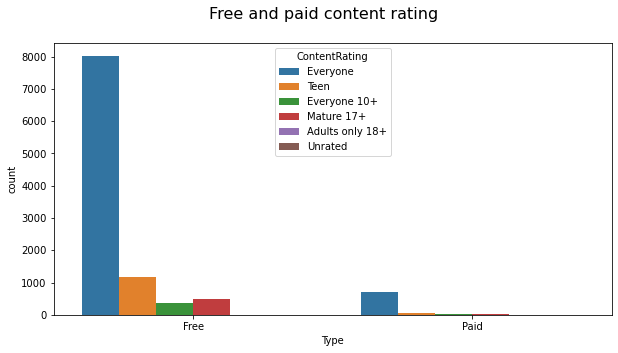

In [26]:
plt.figure(figsize = [10,5])# this for size of the chart
plt.suptitle('Free and paid content rating',fontsize = 16 , color='k' )
sns.countplot(data=df , x="Type" ,hue = "ContentRating", order = f.index);

# Q2 : What are the most downloaded categories?


In [27]:
df.groupby(["Category"])["Installs"].count().reset_index().sort_values(by="Installs",ascending=False).head(5) # Number of downloads categories

,Category,Installs
11,FAMILY,1971
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460


In [28]:
top=df["Category"].value_counts()

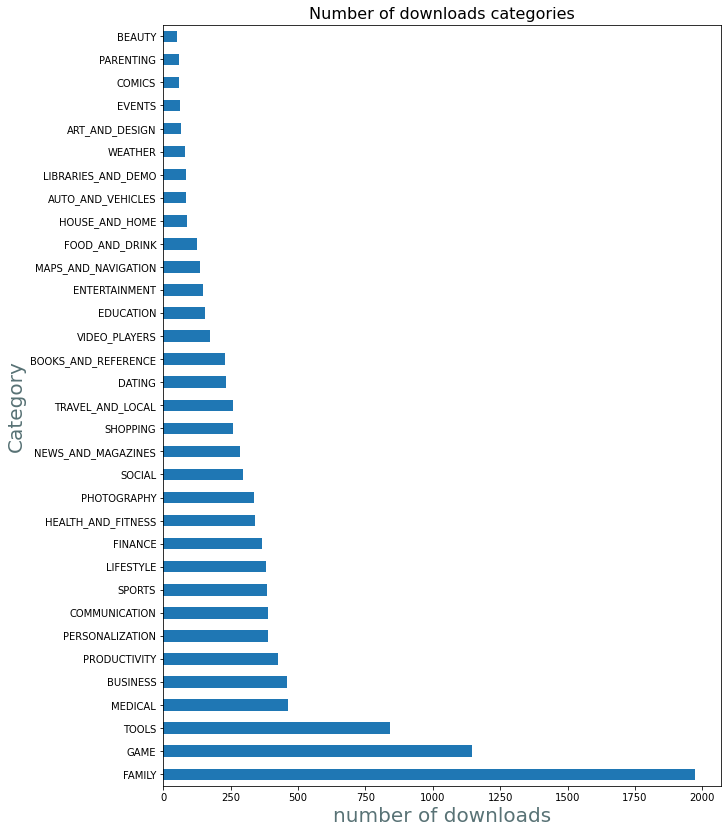

In [29]:
plt.title("Number of downloads categories", fontsize = 16 , color='k') # To write Title 
plt.xlabel('number of downloads' , fontsize = 20 , color='#587275') # To write in x axis or modify
plt.ylabel('Category', fontsize = 20 , color='#587275') # To write in y axis or modify
top.plot(kind="barh",figsize = [10,14]);

# Q3: What is the most downloaded version?


In [30]:
df[df["Installs"]==df.Installs]["AndroidVer"].value_counts() # The number of versions downloaded

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1361
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
2.2 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
Name: AndroidVer, dtype: int64

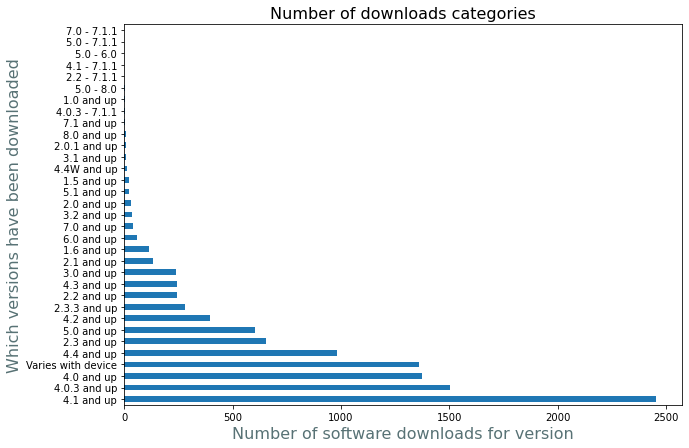

In [31]:
plt.title("Number of downloads categories", fontsize = 16 ) 
plt.xlabel('Number of software downloads for version',  fontsize = 16, color='#587275')# To write in x axis or modify
plt.ylabel('Which versions have been downloaded', fontsize = 16, color='#587275')# To write in y axis or modify
top1 =df.AndroidVer.value_counts()
top1.plot(kind="barh",figsize = [10,7]);

# Q4: what the most download years  ?


In [32]:
df.groupby(["LastUpdated"])["Installs"].count().reset_index().sort_values(by="Installs",ascending=False) # Download number per year

,LastUpdated,Installs
8,2018,7346
7,2017,1867
6,2016,804
5,2015,459
4,2014,209
3,2013,110
2,2012,26
1,2011,15
0,2010,1


In [33]:
X=df.groupby(["LastUpdated"])["Price"].sum().reset_index().sort_values(by="Price",ascending=False)

In [34]:
aa = df.LastUpdated
y1 =df.Price

Text(0, 0.5, 'The number of download')

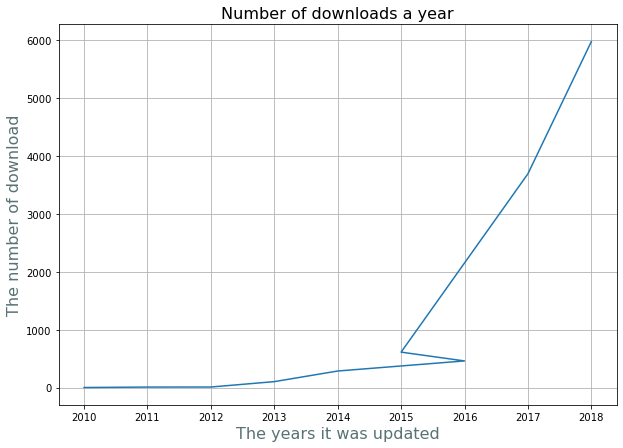

In [35]:




#sns.countplot(data=df , x="LastUpdated" , order = IN_DATA.index);
plt.figure(figsize = [10,7])
plt.grid()
plt.plot(X["LastUpdated"],X['Price'])
plt.title("Number of downloads a year", fontsize = 16)# To write Title 
plt.xlabel("The years it was updated", fontsize = 16 , color='#587275')# To write in x axis or modify
plt.ylabel('The number of download', fontsize = 16  , color='#587275' )# To write in y axis or modify


# Q5: What is the most paid category?

In [36]:
z= df.groupby(["Category"])["Price"].sum().reset_index().sort_values(by="Price",ascending=False) #Calculate the number of profits for each content

In [37]:
z.head() #Show 

,Category,Price
12,FINANCE,2900.830000
11,FAMILY,2434.780000
18,LIFESTYLE,2360.870000
20,MEDICAL,1439.960000
14,GAME,287.300000


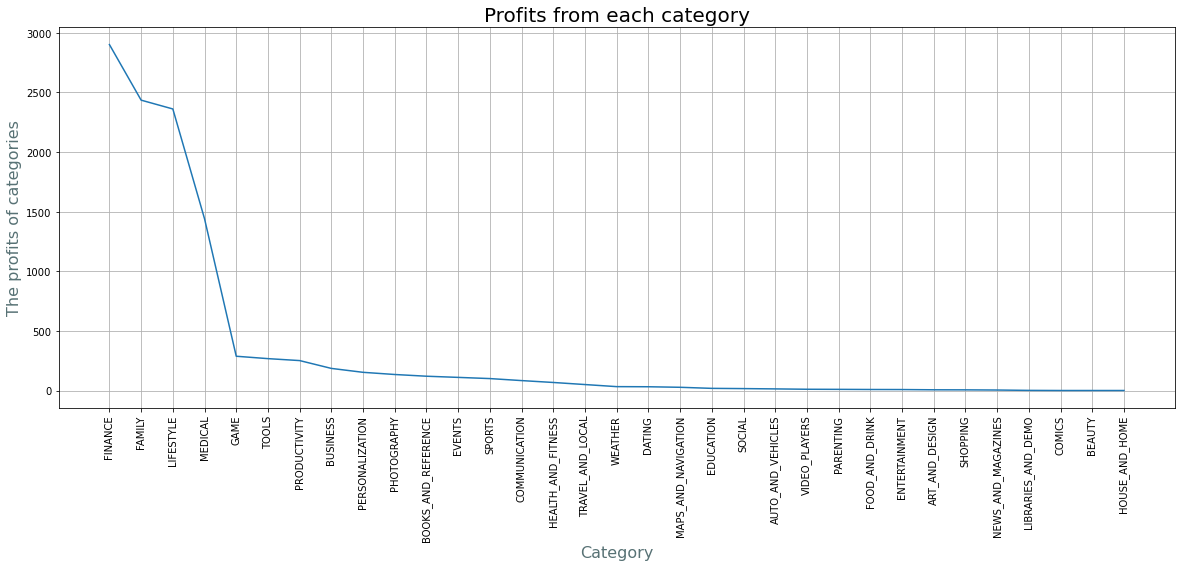

In [38]:
plt.figure(figsize = [20,7])# this for size of the chart
plt.grid()
plt.plot(z['Category'],z['Price'])
plt.title("Profits from each category", fontsize = 20 )# To write Title 
plt.ylabel('The profits of categories', fontsize = 16, color='#587275' )# To write in y axis or modify
plt.xlabel('Category', fontsize = 16, color='#587275')# To write in x axis or modify
plt.xticks(rotation=90); # To write in x axis or modify

# Q6 : What are the most rated categories?  

In [39]:
X=df.groupby(["Category"])["Rating"].sum().reset_index().sort_values(by="Category",ascending=False ) #Calculate the most rated categories

In [40]:
X.index

Int64Index([32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
            15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
           dtype='int64')

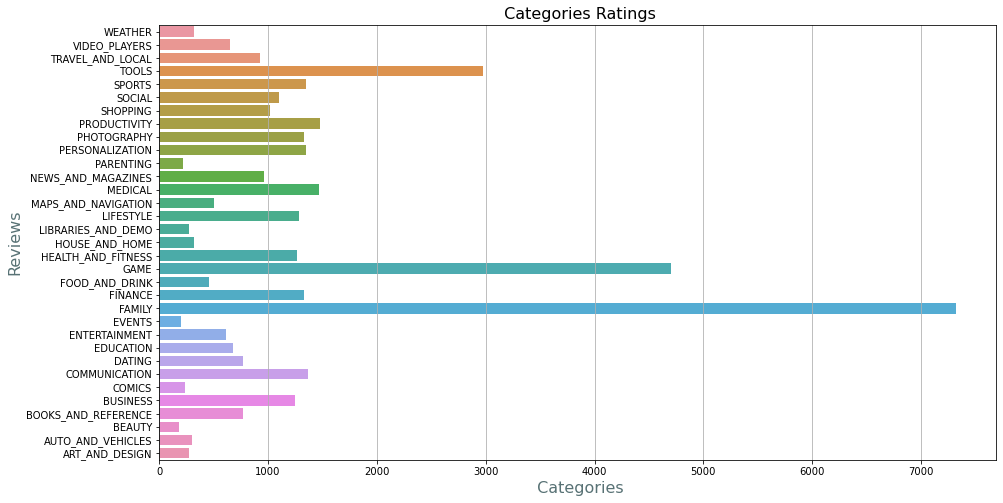

In [41]:
plt.figure(figsize = [15,8])# this for size of the chart
plt.grid()
sns.barplot(data =X , x= "Rating" , y= 'Category')
plt.title(" Categories Ratings", fontsize = 16  )# To write Title 
plt.ylabel('Reviews', fontsize = 16 , color='#587275')# To write in y axis or modify
plt.xlabel(' Categories', fontsize = 16 ,  color='#587275'); # To write in x axis or modify

In [42]:
X

,Category,Rating
32,WEATHER,318.300000
31,VIDEO_PLAYERS,650.200000
30,TRAVEL_AND_LOCAL,928.700000
29,TOOLS,2970.800000
28,SPORTS,1347.300000
27,SOCIAL,1102.200000
26,SHOPPING,1013.800000
25,PRODUCTIVITY,1478.200000
24,PHOTOGRAPHY,1328.900000
23,PERSONALIZATION,1352.600000


In [43]:
df

,App,Category,Rating,Size,Installs,Type,Price,ContentRating,LastUpdated,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,19M,10000.000000,Free,0.000000,Everyone,2018,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,14M,500000.000000,Free,0.000000,Everyone,2018,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,8.7M,5000000.000000,Free,0.000000,Everyone,2018,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,25M,50000000.000000,Free,0.000000,Teen,2018,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,2.8M,100000.000000,Free,0.000000,Everyone,2018,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,53M,5000.000000,Free,0.000000,Everyone,2017,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,3.6M,100.000000,Free,0.000000,Everyone,2018,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.000000,9.5M,1000.000000,Free,0.000000,Everyone,2017,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,Varies with device,1000.000000,Free,0.000000,Mature 17+,2015,Varies with device
